# Lab 4 - Neural Networks

In this lab, we will explore Neural Networks, which can be trained using the Gradient Descent algorithm.

Specifically, we will cover the following topics:

1. A brief introduction to the PyTorch library for implementing Neural Networks.
2. Implementation of a neural network using PyTorch.
3. Discussion on overfitting.
4. An example of a machine learning learning pipeline using the Adult dataset.

### Materials for the Lab:
1. Course slides on Neural Networks.
2. PyTorch documentation: [PyTorch Documentation](https://pytorch.org/docs/stable/)
3. PyTorch tutorials: [PyTorch Tutorials](https://pytorch.org/tutorials/beginner/basics/intro.html)

# 1. Introduction to PyTorch

PyTorch is one of the most widely used libraries for developing deep learning models.

We will cover the basic concepts of PyTorch and provide further explanations as we progress through the tutorial.

We will use PyTorch version: **2.1.0**.

In [1]:
# you can install torch by using the following command
!pip install torch==2.1.0

You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
# you can install torchsummary by using the following command
!pip install torchsummary

You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
torch.__version__

'2.1.0'

# Tensors

Tensors are one of the fundamental components of PyTorch.  
You can think of tensors as similar to NumPy arrays.

Using tensors, PyTorch can create computational graphs and calculate gradients.

Tensors support various operations, which are listed in the following [link](https://pytorch.org/docs/stable/torch.html#pointwise-ops).  
In addition to the PyTorch operations, we can also apply standard Python operators between tensors.

In [5]:
tensor_1 = torch.tensor([[1., 2.], 
                         [3., 3.]])

tensor_2 = torch.tensor([[1., 0], 
                         [-1., 0]])

In [6]:
print("tensor_1 shape: ", tensor_1.shape)
print("tensor_2 shape: ", tensor_2.shape)

tensor_1 shape:  torch.Size([2, 2])
tensor_2 shape:  torch.Size([2, 2])


In [7]:
elem_mul = tensor_1 * tensor_2
print("Element wise multiplication")
print("Result shape: ", elem_mul.size())
elem_mul

Element wise multiplication
Result shape:  torch.Size([2, 2])


tensor([[ 1.,  0.],
        [-3.,  0.]])

In [8]:
matrix_mul = torch.matmul(tensor_1,tensor_2)
print("Matrix multiplication")
print("Result shape: ", matrix_mul.size())
torch.matmul(tensor_1,tensor_2)

Matrix multiplication
Result shape:  torch.Size([2, 2])


tensor([[-1.,  0.],
        [ 0.,  0.]])

In [9]:
# get tensor as numpy array
tensor_1.data.numpy()

array([[1., 2.],
       [3., 3.]], dtype=float32)

To begin lets define a simple polynomial function.

In [10]:
def f(x):
    """
    A convex function
    f(x) = (x-5)^2
    """
    y = (x-5)**2
    return y

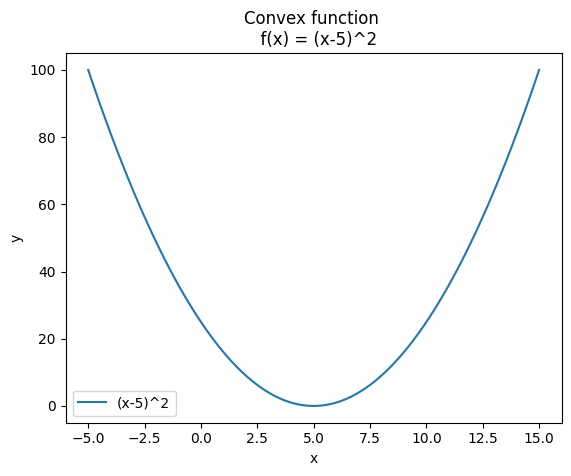

In [11]:
x = torch.linspace(-5, 15,100)

plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.legend()
plt.title("Convex function \n  f(x) = (x-5)^2")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

# Gradient Decent

**Gradient Descent (GD)** is a iterative method to find a minimum of a **convex function**.

**Gradient descent** is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks.

In machine learning, Gradient descent is a way to minimize an objective function whit respect to model’s parameters by updating the parameters in the opposite direction of the gradient of the objective function w.r.t. to the parameters.

<figure>
  <img style="float: left;" src="./figures/Gradiend_descent.png" width="800"/>
</figure>



The above function has the following computational graph

<p align="center">
  <img style="float: left;" src="./figures/Computational_Graph.png" width="500"/>
</p>

The libraries that implement automatic differentiation keep track of the different operation between variables to construct the computational graph.

Having this graph allows us to compute the gradients of complex function.


Having a computational graph we have two main operation:
1. **Forward pass**: calculate the output of the computational graph. In our example the value of f(x)
2. **Backward pass**: calculate the gradients of each node in the computational graph.
   Having the gradients of each node allows us to calculate the final gradient of each node using the chain rule of differentiation.In our example the df/dx.


<p align="center">
  <img style="float: left;" src="./figures/Auto_diff_Computational_Graph.png" width="900"/>
</p>

In [12]:
# create tensors with requires_grad = true in order to indicate pytorch to track the gradients of the tensor.
x = torch.tensor(5.0, requires_grad = True)

# get the output of a function
y = f(x) # forward pass

# Compute gradients using backward function for y
y.backward()

# Access the gradients using x.grad
gradient = x.grad
print("gradient df(x)/dx|(x=5) :", gradient.data.numpy())

gradient df(x)/dx|(x=5) : 0.0


### Implement Gradient Descent
in the following example we will find the minimum of a function using gradient decent.


<figure>
  <img style="float: left;" src="./figures/sgd.png" width="400"/>
</figure>|

In [13]:
x_init= -13.0
thr = 0.0001
step_max = 500
lr = 0.1
min_value = 0

function = f

def gradient_decent(function, x_init, min_value, lr, step_max, thr):
    x = torch.tensor(x_init, requires_grad = True)
    
    x_history = [x.data]
    step = 0 
    while step < step_max:
        # step 1. Forward pass to get the output
        y = function(x)

        # step 2. Backward pass to calculate the gradient
        y.backward()

        # step 3. Update x to find minimum
        gradient = x.grad.data
        x.data = x.data - lr * gradient
        x.grad.data.zero_() # tenchical steps, otherwise accumulate the gradients

        # just keep the values of x
        x_history += [x.data]
        step = step +1
        
        # stoping critiria
        if abs(x.data - x_history[-2]) < thr:
            break
    x_history = np.array(x_history)
    return x.data, step, x_history 

In [14]:
x_min, total_steps, x_history = gradient_decent(function = f, 
                                                x_init = -3.0 ,
                                                min_value=0,
                                                lr = 0.1,
                                                step_max = 100,
                                                thr = 0.001)

In [15]:
print("Total steps to achive minimum:" , total_steps)
print("Minimum:" , x_min.data.numpy())

Total steps to achive minimum: 35
Minimum: 4.9967546


In [16]:
x_history = np.array(x_history)

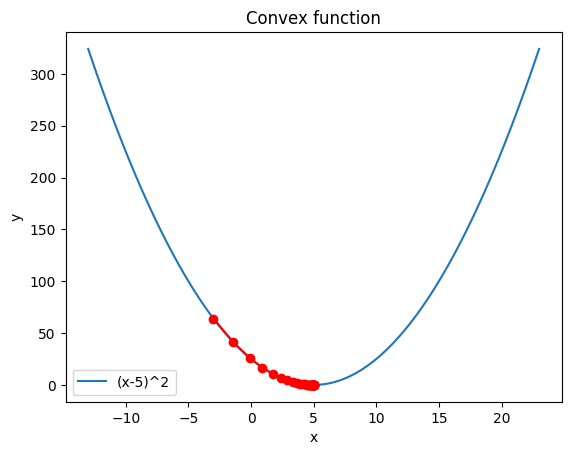

In [17]:
x = np.linspace(-13, 23,100)
# x_history = np.array()
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.plot(x_history, f(x_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

# Loading the Adult Dataset

The [Adult dataset](https://archive.ics.uci.edu/dataset/2/adult) is used for a binary classification task.   
The objective is to predict whether an individual's income exceeds $50,000 based on various socio-economic features.

In [22]:
from collections import OrderedDict

data_types = OrderedDict([
    ("age", "int"),
    ("workclass", "category"),
    ("final_weight", "int"),  # originally it was called fnlwgt
    ("education", "category"),
    ("education_num", "int"),
    ("marital_status", "category"),
    ("occupation", "category"),
    ("relationship", "category"),
    ("race", "category"),
    ("sex", "category"),
    ("capital_gain", "float"),  # required because of NaN values
    ("capital_loss", "int"),
    ("hours_per_week", "int"),
    ("native_country", "category"),
    ("income_class", "category"),
])
target_column = "income_class"

In [23]:
def read_dataset(path):
    return pd.read_csv(
        path,
        names=data_types,
        index_col=None,

        comment='|',  # test dataset has comment in it
        skipinitialspace=True,  # Skip spaces after delimiter
        na_values={
            'capital_gain': 99999,
            'workclass': '?',
            'native_country': '?',
            'occupation': '?',
        },
        dtype=data_types,
    )

def clean_dataset(data):
    # Test dataset has dot at the end, we remove it in order
    # to unify names between training and test datasets.
    data['income_class'] = data.income_class.str.rstrip('.').astype('category')

    # Remove final weight column since there is no use
    # for it during the classification.
    data = data.drop('final_weight', axis=1)

    # Duplicates might create biases during the analysis and
    # during prediction stage they might give over-optimistic
    # (or pessimistic) results.
    data = data.drop_duplicates()

    # Binary target variable (>50K == 1 and <=50K == 0)
    data[target_column] = (data[target_column] == '>50K').astype(int)

    # Categorical dataset
    categorical_features = data.select_dtypes('category').columns
    data[categorical_features] = data.select_dtypes('category').apply(lambda x: x.cat.codes)
    return data

In [24]:
# !pip install --upgrade certifi

In [25]:
import pandas as pd
# get and clean train dataset
TRAIN_DATA_FILE = 'data/adult/adult.data'# 'adult/adult.data'
train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
train_data = train_data.dropna()
print("Train dataset shape:", train_data.shape)

# get and clean test dataset
TEST_DATA_FILE = 'data/adult/adult.test' #'adult/adult.test'
test_data = clean_dataset(read_dataset(TEST_DATA_FILE))
test_data = test_data.dropna()
print("Test dataset shape:", test_data.shape)

Train dataset shape: (28938, 14)
Test dataset shape: (15175, 14)


In [26]:
target_column = "income_class"
features = train_data.columns.difference([target_column])

In [27]:
train_data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,6,9,13,4,0,1,4,1,2174.0,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0.0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0.0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0.0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0.0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,3,12,14,2,3,0,4,1,0.0,0,40,38,1
32555,22,3,15,10,4,10,1,4,1,0.0,0,40,38,0
32556,27,3,7,12,2,12,5,4,0,0.0,0,38,38,0
32558,58,3,11,9,6,0,4,4,0,0.0,0,40,38,0


### Get train/val/test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[[target_column]], test_size=0.1)
X_test, y_test = test_data[features], test_data[[target_column]]

### Data Scalling

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = features)

X_val = pd.DataFrame(scaler.transform(X_val),columns = features) # note that here we just use the transform method!
X_test = pd.DataFrame(scaler.transform(X_test),columns = features) # note that here we just use the transform method!

In [30]:
X_train.shape, X_val.shape, X_test.shape

((26044, 13), (2894, 13), (15175, 13))

# Neural Networks

Neural Networks are powerful function approximator that archives state-of-the-art performance on a lot of application the last decade on machine learning.

The performance of the Deep Neural Network's is due to their high number of parameters and the efficient learning methods used to train those networks.
For example the gtp-3 languages model was about by 175 billion parameters.

Neural Networks, adjust their **parameters** (training), using the gradient descent method to **minimise a loss function** $L$.

<figure>
  <img style="float: left;" src="./figures/neural_net_new.png" width="800"/>
</figure>|

### Operation of each node

<figure>
  <img style="float: left;" src="./figures/neuron_2.png" width="600"/>
</figure>

# Activation Functions

Activation functions play an integral role in neural networks by introducing non-linearity.
This non-linearity allows neural networks to develop complex representations and functions based on the inputs that would not be possible with a simple linear layers.

Bellow we illustrate some of the most famous activation functions

<figure>
  <img style="float: left;" src="./figures/acitvation_fun.png" width="600"/>
</figure>

# Binary Classification problem

In classification problem the output of the neural network can be probability of each class p(y|x).

So for binary classification we can do that using a single output to indicate the p(y=1|x).  
This has to be bounded between [0,1] in order to be a probability.
To do so we can use the sigmoid function that we can illustrate bellow.

<figure>
  <img style="float: left;" src="./figures/sigmoid.png" width="400"/>
</figure>

# Define Neural Network with pytorch

We will implement a simple neural network for classification problem with pytorch.  
The following network has 2 hidden layers following by an output layer.

In [31]:
class NeuralNetwork(torch.nn.Module):
    """
    Simple two layer neural network for regression
    """
    def __init__(self, num_input_features):
        super().__init__()
        
        # layer 1
        layer_1_units = 200
        self.layer_1 = torch.nn.Linear(in_features=num_input_features,
                                       out_features=layer_1_units)
        self.activation_1 = torch.nn.ReLU()
        
        # layer  2
        layer_2_units = 100
        self.layer_2 = torch.nn.Linear(in_features=layer_1_units,
                                       out_features=layer_2_units)
        self.activation_2 = torch.nn.ReLU()
        
        # layer output layer
        self.out_layer = torch.nn.Linear(in_features=layer_2_units,
                                         out_features=1)
        self.out_activation= torch.nn.Sigmoid()

    def forward(self, x):
        x_1 = self.activation_1( self.layer_1( x ) )
        x_2 = self.activation_2( self.layer_2( x_1 ) )
        output = self.out_activation(self.out_layer(x_2))
        return output

In [33]:
from torchsummary import summary
model = NeuralNetwork(num_input_features=12)
summary(model, input_size= [[12]])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 200]           2,600
              ReLU-2                  [-1, 200]               0
            Linear-3                  [-1, 100]          20,100
              ReLU-4                  [-1, 100]               0
            Linear-5                    [-1, 1]             101
           Sigmoid-6                    [-1, 1]               0
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.09
Estimated Total Size (MB): 0.09
----------------------------------------------------------------


### make predictions

In [36]:
x = torch.rand((100,12))
                  
predicted_proba = model.forward(x)

In [38]:
predicted_proba.shape # p(y=1|x)

torch.Size([100, 1])

In [39]:
predicted_proba

tensor([[0.4621],
        [0.4721],
        [0.4558],
        [0.4757],
        [0.4519],
        [0.4646],
        [0.4632],
        [0.4621],
        [0.4578],
        [0.4554],
        [0.4603],
        [0.4738],
        [0.4677],
        [0.4574],
        [0.4621],
        [0.4602],
        [0.4666],
        [0.4698],
        [0.4649],
        [0.4573],
        [0.4642],
        [0.4671],
        [0.4608],
        [0.4599],
        [0.4665],
        [0.4776],
        [0.4658],
        [0.4603],
        [0.4695],
        [0.4628],
        [0.4712],
        [0.4721],
        [0.4708],
        [0.4569],
        [0.4611],
        [0.4556],
        [0.4702],
        [0.4721],
        [0.4701],
        [0.4576],
        [0.4618],
        [0.4624],
        [0.4745],
        [0.4626],
        [0.4683],
        [0.4563],
        [0.4753],
        [0.4607],
        [0.4762],
        [0.4602],
        [0.4719],
        [0.4610],
        [0.4611],
        [0.4664],
        [0.4619],
        [0

In [40]:
# make predictions
thr = 0.5
predictions = (predicted_proba > thr) * 1
predictions

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],

### optimise network
perfom a single iteration of sgd.

#### Loss
Then we can use the binary cross entropy loss as the **loss function**

<figure>
  <img style="float: left;" src="./figures/binary_ce.png" width="400"/>
</figure>



Where
$$\hat{Y} = f(x) = p(y=1|x)$$

In [53]:
model = NeuralNetwork(num_input_features=12)
loss_fn = torch.nn.BCELoss()

# to make the optimization pytorch has different optimizers. 
lr = 1.1
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [60]:
model.layer_2.weight

Parameter containing:
tensor([[-0.0016,  0.0300,  0.0334,  ...,  0.0680, -0.0161, -0.0618],
        [ 0.0064,  0.0186, -0.0443,  ...,  0.0580,  0.0515, -0.0430],
        [ 0.0067,  0.0217, -0.0066,  ..., -0.0030, -0.0216,  0.0044],
        ...,
        [-0.0432,  0.0228,  0.0273,  ..., -0.0351, -0.0293,  0.0333],
        [ 0.0289,  0.0018, -0.0515,  ..., -0.0564,  0.0274,  0.0245],
        [-0.0528, -0.0238, -0.0242,  ..., -0.0568, -0.0482, -0.0378]],
       requires_grad=True)

In [61]:
x = torch.rand((100, 12))
y = torch.randint(0, 1, (100, 1), dtype = torch.float)
                  
predicted_proba = model.forward(x)
loss = loss_fn(predicted_proba, y)
                  
loss.backward()
optimizer.step() # The optimiser automaticaly update the weights using the gradients.

optimizer.zero_grad() # reset the gradients

In [62]:
model.layer_2.weight

Parameter containing:
tensor([[-0.0009,  0.0300,  0.0336,  ...,  0.0680, -0.0160, -0.0617],
        [ 0.0070,  0.0187, -0.0441,  ...,  0.0580,  0.0515, -0.0430],
        [ 0.0067,  0.0217, -0.0066,  ..., -0.0030, -0.0216,  0.0044],
        ...,
        [-0.0432,  0.0228,  0.0273,  ..., -0.0351, -0.0293,  0.0333],
        [ 0.0307,  0.0019, -0.0508,  ..., -0.0564,  0.0275,  0.0247],
        [-0.0528, -0.0238, -0.0242,  ..., -0.0568, -0.0482, -0.0378]],
       requires_grad=True)

## Additional Tips
Some additional tips for the projects:

### 1. Multi-Class Classification
Used when the model needs to predict one label from multiple classes.
1. The output layer must have **as many outputs as the number of classes**.
2. Use the **softmax activation function**.
3. The loss function should be **Cross-Entropy**.

### 2. Regression
Used for predicting continuous values based on input features.
1. The output is usually **one dimension** i.e 1 node.
2. We use a **linear activation function**, i.e., no activation.
3. The loss function is the **Mean Squared Error**.


For the learning rate, values typically range from 1e-5 to 1e-3.

# Training Loop

When we train neural network we usually train our model using batches of training example.


<figure>
  <img style="float: left;" src="./figures/batches.png" width="500"/>
</figure>



Batching method is performed for different reasons.
First of all in we have a huge dataset we cannot fit all the data in our memery.
Moreover, using batches requires less time to fit the model as in the same time you can perform more update in the weights of the model. One drawback of using batches is that we approximate the gradient directions, so having very small batch size can affect the coverage of your model.

So batch size is an additional hyperparameter of our training algorithm.

<figure>
  <img style="float: left;" src="./figures/train_loop.png" width="500"/>
</figure>

lets use pytorch to batch our data. 

In summary PyTorch provides two main data classes: **DataLoader** and **Dataset** to handle your data. 

**Dataset**  stores the samples and their corresponding labels, and **DataLoader** wraps an iterable around the Dataset to enable easy access to the batches.

you can read more at: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [36]:
# covert data into tensors
train_x_tensor = torch.tensor(X_train.values, dtype=torch.float)
train_y_tensor = torch.tensor(y_train.values, dtype=torch.float)

# use the dataset class wrapper for tensors
train_tensor_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)# there are more coplex dataset
                                                                                     # i.e images or text data

# pass the dataset class into Dataloader to batch and shuffle your data
train_dataloader = torch.utils.data.DataLoader(train_tensor_dataset,
                                               batch_size=64,
                                               shuffle=True)

In [37]:
for i, batch in enumerate(train_dataloader):
    batch_x, batch_y = batch # get next iteam

In [38]:
batch_x.shape

torch.Size([60, 13])

In [39]:
# convert val data to tensor for later
val_x_tensor = torch.tensor(X_val.values, dtype=torch.float)
val_y_tensor = torch.tensor(y_val.values, dtype=torch.float)

In [40]:
val_x_tensor

tensor([[ 0.6442, -0.2452, -0.2303,  ..., -0.9079,  0.7144,  0.7537],
        [ 0.6442,  1.6851, -0.2303,  ..., -0.9079,  0.7144,  2.0941],
        [ 0.0585, -0.2452, -0.2303,  ..., -0.2905, -1.3998,  0.0835],
        ...,
        [-0.1612, -0.2452, -0.2303,  ..., -0.2905,  0.7144,  0.0835],
        [-1.4058, -0.2452, -0.2303,  ...,  0.9443, -1.3998,  0.0835],
        [ 2.6209,  0.7438, -0.2303,  ..., -0.9079,  0.7144,  0.0835]])

# Define training loop


<figure>
  <img style="float: left;" src="./figures/train_loop.png" width="400"/>
</figure>

In [41]:
def training_step(model, input_data, optimizer, loss_fn):
    # reset gradients of the optimizer
    optimizer.zero_grad()
    
    # unfold data
    x_batch, y_batch = input_data
    
    # get predictions
    y_pred_propa = model.forward(x_batch)
    
    # calculate loss
    loss = loss_fn(y_pred_propa, y_batch)

    # compute gradients 
    loss.backward()
    
    # optimise network
    optimizer.step()
    
    # compute metrics for monitoring
    with torch.no_grad(): 
        y_pred = (y_pred_propa>0.5) * 1
    train_acc = torch.sum(y_pred == y_batch) / y_batch.shape[0]

    return loss.data.numpy(), train_acc.data.numpy()

In [42]:
def evaluation_step(model, input_data, loss_fn):
    # when we use torch.no_grad pytorch didnt store information
    # that is required to calculate gradients so is fasterr 
    with torch.no_grad(): 
        x_batch, y_batch = input_data
        y_pred_proba = model(x_batch)
    loss = loss_fn(y_pred_proba, y_batch)

    # compute metrics
    y_pred = (y_pred_proba>0.5) * 1
    acc = torch.sum(y_pred == y_batch) / y_batch.shape[0]
    return loss.data.numpy(), acc.data.numpy()

In [43]:
model = NeuralNetwork(num_input_features=13)

lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.BCELoss() # binary cross entropy

In [44]:
# parameters of the training loop
epochs = 400

In [45]:
# -------------------- Train  Loop----------------------------
train_history = []
val_history = []
for epoch in range(epochs): # iterate over epoch    

    # -------------------- 1. Training on each epoch ----------------------------
    accumulated_loss,accumulated_accuracy = 0, 0 # monitor loss and metrics during training
    for step, batch_data in enumerate(train_dataloader): # iterate over batch
        loss, accuracy = training_step(model,batch_data,optimizer,loss_fn) # train model using a single batch
        accumulated_loss = (step * accumulated_loss + loss)/(step+1)
        accumulated_accuracy =  (step * accumulated_accuracy + accuracy)/(step+1)
        
    # store the loss and the metrics at the end of each epoch
    train_history += [{"loss":accumulated_loss, "accuracy":accumulated_accuracy, "epoch": epoch}]
    
    # -------------------- 2. Monitor Error on Validation set ----------------------------
    val_loss, val_accuracy = evaluation_step(model, (val_x_tensor, val_y_tensor), loss_fn)
    val_history += [{"loss":val_loss, "accuracy":val_accuracy, "epoch": epoch}]
    
    # -------------------- 3. Display Performance every several epochs ----------------------------
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}:  loss:{accumulated_loss:.3f}, accuracy-:{accumulated_accuracy:.3f}, val_loss:{val_loss:.3f}, val_accuracy->{val_accuracy:.3f}")

Epoch 0/400:  loss:0.458, accuracy-:0.789, val_loss:0.390, val_accuracy->0.828
Epoch 10/400:  loss:0.333, accuracy-:0.843, val_loss:0.332, val_accuracy->0.842
Epoch 20/400:  loss:0.326, accuracy-:0.846, val_loss:0.327, val_accuracy->0.843
Epoch 30/400:  loss:0.322, accuracy-:0.848, val_loss:0.328, val_accuracy->0.844
Epoch 40/400:  loss:0.318, accuracy-:0.850, val_loss:0.325, val_accuracy->0.843
Epoch 50/400:  loss:0.314, accuracy-:0.851, val_loss:0.353, val_accuracy->0.847
Epoch 60/400:  loss:0.311, accuracy-:0.852, val_loss:0.359, val_accuracy->0.843
Epoch 70/400:  loss:0.307, accuracy-:0.853, val_loss:0.327, val_accuracy->0.846
Epoch 80/400:  loss:0.304, accuracy-:0.855, val_loss:0.359, val_accuracy->0.843
Epoch 90/400:  loss:0.302, accuracy-:0.855, val_loss:0.330, val_accuracy->0.841
Epoch 100/400:  loss:0.298, accuracy-:0.858, val_loss:0.327, val_accuracy->0.842
Epoch 110/400:  loss:0.296, accuracy-:0.859, val_loss:0.329, val_accuracy->0.842
Epoch 120/400:  loss:0.293, accuracy-:0

In [46]:
val_history_df = pd.DataFrame(val_history)
train_history_df = pd.DataFrame(train_history)

#  Overfitting

**Overfitting** refers to the phenomenon when our model performs well on the training set but exhibits poor performance on the testing set.

Since neural networks have a large number of parameters can memories the examples, resulting in bad performance during testing.  

This occurs when the model exploits pattern between the data (X) and the labels (Y) that is not in the testing data.

<figure>
  <img style="float: left;" src="./figures/overfiting.jpg" width="800"/>
</figure>

### Learning Curves

One way to prevent overfiting is to monitor the performance of our algorithm on the validation set.

Learning curves track the performance of the model during training by measuring various metrics at regular optimization steps.   

Learning curves provide valuable insights into the model's behavior, allowing us to detect overfitting.

To identify overfitting, we typically compare the learning curves of the training and validation sets.

<figure>
  <img style="float: left;" src="./figures/epoch-error-curve-fitting.png" width="400"/>
</figure>

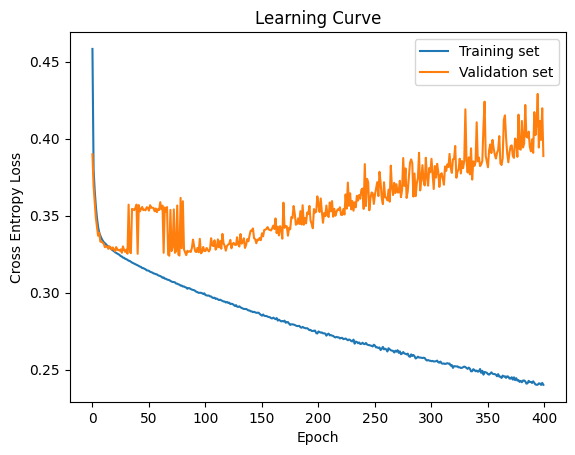

In [47]:
plt.figure()
plt.plot(train_history_df["epoch"],train_history_df["loss"], label = "Training set")
plt.plot(val_history_df["epoch"],val_history_df["loss"], label = "Validation set")
plt.title("Learning Curve")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.legend()

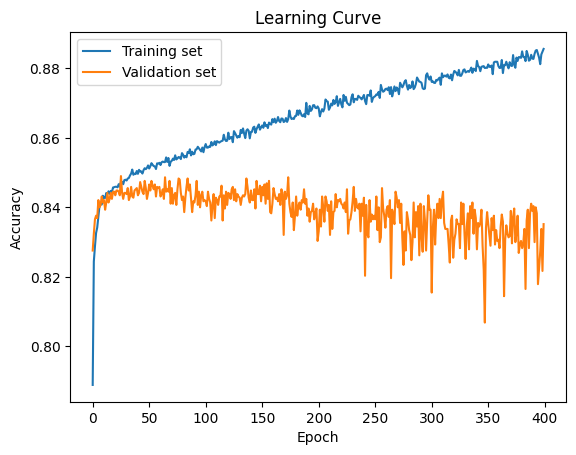

In [48]:
plt.figure()
plt.plot(train_history_df["epoch"],train_history_df["accuracy"], label = "Training set")
plt.plot(val_history_df["epoch"],val_history_df["accuracy"], label = "Validation set")
plt.title("Learning Curve")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

# Assignment

In this assignment, we will explore the effects of different techniques to reduce overfitting when training a neural network.

1. Early Stopping
2. Reducing Model Parameters
3. Weight Regularization

# A. Early stopping
Early stopping is an optimization technique used to reduce overfitting without compromising on model accuracy. The main idea behind early stopping is to stop training before a model starts to over-fit.


To use early stopping, you watch for the validation loss. If it stops improving for several consecutive epochs , indicated by the "patient" parameter, you stop training.

**Steps:**
   1) Implement Early Stopping.
       A) stop after the model is not improving the Validation loss for "patient"consecutive epochs
       B) stop the best weights!
   2) Train your model using early stopping.
   3) Set the best weights after training stops.
   3) Check different patient parameters. For example, you can set patient = {5 , 100}. Can the patient parameter affect the coverage of your network? What you observe in the training curves?

# Solution

In [50]:
# -------------------- Train  Loop----------------------------
def train_loop(patient, epochs, model, optimizer, loss_fn):
    # use this!
    best_loss = np.inf
    consecutive_epoch = 0
    best_epoch = 0
    best_weights = None

    train_history = []
    val_history = []
    for epoch in range(epochs): # iterate over epoch    

        # -------------------- Training on each epoch ----------------------------
        total_step = len(train_dataloader)
        accumulated_loss = 0 # monitor loss during training
        accumulated_accuracy = 0 # monitor  accuracy during training
        accuracy_list = []
        for step in range(total_step): # iterate over batch
            batch_data = next(iter(train_dataloader)) # get a batch
            loss, accuracy = training_step(model,batch_data,optimizer,loss_fn) # train model using a single batch
            accuracy_list += [accuracy]
            accumulated_loss = (step * accumulated_loss + loss)/(step+1)
            accumulated_accuracy =  (step * accumulated_accuracy + accuracy)/(step+1)

        train_history += [{"loss":accumulated_loss, "accuracy":accumulated_accuracy, "epoch": epoch, "set":"train"}]

        # -------------------- Monitor Error Validation set ----------------------------
        val_data = (val_x_tensor, val_y_tensor)
        val_loss, val_accuracy = evaluation_step(model, val_data, loss_fn)
        val_history += [{"loss":val_loss, "accuracy":val_accuracy, "epoch": epoch, "set":"val"}]
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}:  loss:{accumulated_loss:.3f}, accuracy-:{accumulated_accuracy:.3f}, val_loss:{val_loss:.3f}, val_accuracy->{val_accuracy:.3f}")

        # -------------------- Early Stoping ----------------------------
        # Add you code here. Remember to strore the weights
        
        
    val_history_df = pd.DataFrame(val_history)
    train_history_df = pd.DataFrame(train_history)
    return model, val_history_df, train_history_df, best_loss, best_epoch, best_weights

In [ ]:
# train
 
# set best weights to the model

# B. Reduce the Size of the Network

The capacity (total number of parameters) of the model affects the training process. If the parameters are too numerous compared to the difficulty of the underlying problem, it's very easy to overfit.

To address this issue, reduce the total number of parameters in the model by decreasing the number of units in each layer, and then comment on the results.

**Steps:**
1. Reduce the size of the network by lowering the number of units. You can use 60 units for the first layer and 20 units for the second one.
2. Train your model without early stopping.
3. Compare the learning curve of this model with the learning curve of the larger model we trained without early stopping (used in section Learning Curves and Overfitting).

# Solution

# C. Weight Regularization

Weight Regularization is another very famous technique to reduce overfitting.
The concept of regularization is to add a constraint in the loss function to keep the weights of the model small.

To get the intuition, weights regularization discourages the model from fitting the training data too closely and forces it to focus on the most important features. By constraining the model's weights, it can generalize better to new data because it's less likely to memorize the training examples and is more likely to capture underlying patterns and relationships in the data.

A very famous and easy regularization is the L2-regularization where we modify the loss function as follows:

$$ \text{Total Loss} = \mathbb{E}_{x,y \sim P_{data}} \left[ loss(f_w(x),y) \right] + \lambda \sum_{j=1}^{p} w_j^2 $$

Where $\lambda$ is a scaling paramter, $loss$ in the loss function, $w$ the parameters of the model. Finally, $p$ indicates the set of different parameters

In pytorch is very easy to apply L2-regularization. You can do that using the weight_decay ($\lambda$) parameter of the optimizer class.

```python
torch.optim.SGD(model.parameters(), lr=lr, weight_decay=λ)


**Steps :**
1) Use $\lambda = 0.01$ and train your model using L2 regularization, as explained begore.  
Use the model architeture with the more paramter and dont aply early stoping to see the effect.
3) Compare with the initial training without early stoping (used in section Learning Curves and Overfitting) and comment on the results.

# Solution

#### comments
Adding regulation term can also help us to prevent overting.  
As all the previus methods we introduce one new hyperparameter that we have to fit.  
finaly in practive we using all the aforemention method.

# C. Test set perfomance

mesure the accuracy of the different model on the test set you create before.

Make sure you normalise you data using the "scaler" we define at the begining of the notebook.

In [148]:
# step 1. select data point from test set

# step 2. use scaler to transform

# step 3. transform datat to tensor

# step 4. get the predicted propabilities

# step 5. get predictions from propabilitiers

# step 6. get accuracy